In [1]:
import sys
import json

with open('../paths', 'r') as f:
    globals().update(json.loads(f.read()))

In [2]:
sys.path.append(path_Modules_Product_)
sys.path.append(path_Modules_Toolbox_)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import data_processing as myprep
import handles as myhandles
import plots as myplots

# Dataset Generating

## Raw data 2 Dataset

In [3]:
raw_data = pd.ExcelFile(path_data_raw_+'dataset_main.xlsx')

In [4]:
tmp_data = pd.read_excel(raw_data,
                         sheet_name='Table S4',
                         usecols=[
                             'Plasma sample ID #', 'Age', 'Sex', 'Race',
                             'Tumor type', 'AJCC Stage', 'Histopathology',
                             'Plasma volume (mL)',
                             'Plasma DNA concentration (ng/mL)'
                         ])
tmp_data.set_index('Plasma sample ID #', inplace=True)
tmp_data.index = [i.replace(' ', '_') for i in tmp_data.index]
tmp_data.Age = tmp_data.Age.astype(int)
tmp_data.Sex.replace(['Male', 'Female'], ['M', 'F'], inplace=True)
tmp_data['AJCC Stage'].replace([np.nan, 'I', 'II', 'III'], [0, 1, 2, 3],
                               inplace=True)
tmp_data['Histopathology'].replace([np.nan], ['Normal'], inplace=True)
for i in tmp_data.columns:
    print(i, tmp_data[i].dtype, tmp_data[i].unique())

display(tmp_data.head())
dataset = tmp_data.copy()

Age int64 [59 68 69 43 72 66 47 77 55 51 80 53 65 81 62 74 58 82 78 73 71 56 22 67
 70 79 61 63 60 75 57 49 88 38 85 52 46 91 76 45 44 86 89 41 84 36 50 42
 39 64 54 37 24 48 35 87 93 90 83 92 33 30 29 34 28 40 18 23 27 25 26 19
 20 21 17 32]
Sex object ['M' 'F']
Race object ['Caucasian' 'Black' 'Unknown' 'Asian' 'Hispanic' 'Black/Hispanic'
 'Caucasian/Hispanic' 'Other']
Tumor type object ['Colorectum' 'Lung' 'Breast' 'Pancreas' 'Ovary' 'Esophagus' 'Liver'
 'Stomach' 'Normal']
AJCC Stage int64 [1 2 3 0]
Histopathology object ['Adenocarcinoma' 'Non-small cell lung cancer'
 'Invasive lobular carcinoma' 'Invasive ductal adenocarcinoma'
 'Invasive carcinoma (NOS)' 'Epithelial carcinoma'
 'Squamous cell carcinoma' 'Hepatocellular carcinoma' 'Cholangiocarcinoma'
 'Small cell' 'Metaplastic carcinoma' 'Normal']
Plasma volume (mL) float64 [5.   4.   4.5  7.5  7.   6.5  6.   5.66 5.5  7.26 6.52 7.18 3.   2.
 3.5 ]
Plasma DNA concentration (ng/mL) float64 [ 6.07969615 46.00521957  6.94007107 ... 

Age Sex       Race  Tumor type  AJCC Stage  Histopathology  \
CRC_455_PLS_1   59   M  Caucasian  Colorectum           1  Adenocarcinoma   
CRC_456_PLS_1   59   F  Caucasian  Colorectum           1  Adenocarcinoma   
CRC_457_PLS_1   68   F  Caucasian  Colorectum           2  Adenocarcinoma   
CRC_458_PLS_1   69   F  Caucasian  Colorectum           2  Adenocarcinoma   
CRC_459_PLS_1   43   F  Caucasian  Colorectum           2  Adenocarcinoma   

               Plasma volume (mL)  Plasma DNA concentration (ng/mL)  
CRC_455_PLS_1                 5.0                          6.079696  
CRC_456_PLS_1                 4.0                         46.005220  
CRC_457_PLS_1                 4.5                          6.940071  
CRC_458_PLS_1                 7.5                          7.149544  
CRC_459_PLS_1                 5.0                          9.814674

In [5]:
tmp_data = pd.read_excel(raw_data,
                         sheet_name='Table S5',
                         usecols=[
                             'Sample ID #',
                             'Mutation identified in plasma*', 
                             'Ω score',
                             'Mutant allele frequency (%)',
                             'Mutant fragments/mL plasma'
                         ])
tmp_data.set_index('Sample ID #', inplace=True)
tmp_data.index = [i.replace(' ', '_') for i in tmp_data.index]
for i in tmp_data.columns:
    print(i,tmp_data[i].dtype, tmp_data[i].unique())

display(tmp_data.head())

Mutation identified in plasma* object ['TP53 p.K120E, c.358A>G' 'TP53 p.S240I, c.719G>T'
 'TP53 p.R202C, c.604C>T' 'TP53 p.R248Q, c.743G>A'
 'TP53 p.A276G, c.827C>G' 'CTNNB1 p.S45F, c.134C>T'
 'TP53 p.Y220H, c.658T>C' 'TP53 p.A161T, c.481G>A'
 'TP53 p.R273H, c.818G>A' 'TP53 p.P12S, c.34C>T'
 'TP53 p.L264fs, c.791delT' 'CDKN2A p.A76T, c.226G>A'
 'TP53 p.G245S, c.733G>A' 'TP53 p.E286G, c.857A>G'
 'TP53 p.A138T, c.412G>A' 'APC p.E1306*, c.3916G>T'
 'TP53 p.R196*, c.586C>T' 'KRAS p.G13D, c.38G>A' 'TP53 p.R174G, c.520A>G'
 'TP53 p.G262D, c.785G>A' 'TP53 p.R249G, c.745A>G'
 'TP53 p.R282W, c.844C>T' 'FBXW7 p.R465C, c.1393C>T'
 'KRAS p.G12C, c.34G>T' 'CTNNB1 p.T41A, c.121A>G'
 'PIK3CA p.H1047R, c.3140A>G' 'TP53 p.P300S, c.898C>T'
 'FBXW7 p.R505H, c.1514G>A' 'TP53 p.R335H, c.1004G>A'
 'KRAS p.G12D, c.35G>A' 'NRAS p.A59T, c.175G>A' 'TP53 p.V157F, c.469G>T'
 'KRAS p.Q61K, c.181C>A' 'TP53 p.L383H, c.1148T>A'
 'FBXW7 p.R465H, c.1394G>A' 'TP53 p.L348S, c.1043T>C'
 'TP53 p.A347T, c.1039G>A' 'APC p.R1

Ω score float64 [2.96281952 2.44540475 1.21575799 ... 7.96256131 0.80768477 1.4252032 ]
Mutant allele frequency (%) float64 [0.27218291 0.02262512 0.06345849 ... 1.8826937  0.05238802 0.02639335]
Mutant fragments/mL plasma float64 [  5.09675126   3.20589029   1.35645175 ... 374.05558078   2.21212484
   1.61027567]


Mutation identified in plasma*   Ω score  \
CRC_455_PLS_1         TP53 p.K120E, c.358A>G  2.962820   
CRC_456_PLS_1         TP53 p.S240I, c.719G>T  2.445405   
CRC_457_PLS_1         TP53 p.R202C, c.604C>T  1.215758   
CRC_458_PLS_1         TP53 p.R248Q, c.743G>A  1.640793   
CRC_459_PLS_1         TP53 p.A276G, c.827C>G  1.325771   

               Mutant allele frequency (%)  Mutant fragments/mL plasma  
CRC_455_PLS_1                     0.272183                    5.096751  
CRC_456_PLS_1                     0.022625                    3.205890  
CRC_457_PLS_1                     0.063458                    1.356452  
CRC_458_PLS_1                     0.164990                    3.633174  
CRC_459_PLS_1                     0.083155                    2.513702

In [6]:
dataset = pd.concat((dataset,tmp_data),axis=1)

In [7]:
tmp_data = pd.read_excel(
    raw_data,
    sheet_name='Table S6',
    usecols=[
        'Sample ID #', 'AFP (pg/ml)', 'Angiopoietin-2 (pg/ml)', 'AXL (pg/ml)',
        'CA-125 (U/ml)', 'CA 15-3 (U/ml)', 'CA19-9 (U/ml)', 'CD44 (ng/ml)',
        'CEA (pg/ml)', 'CYFRA 21-1 (pg/ml)', 'DKK1 (ng/ml)',
        'Endoglin (pg/ml)', 'FGF2 (pg/ml)', 'Follistatin (pg/ml)',
        'Galectin-3 (ng/ml)', 'G-CSF (pg/ml)', 'GDF15 (ng/ml)', 'HE4 (pg/ml)',
        'HGF (pg/ml)', 'IL-6 (pg/ml)', 'IL-8 (pg/ml)', 'Kallikrein-6 (pg/ml)',
        'Leptin (pg/ml)', 'Mesothelin (ng/ml)', 'Midkine (pg/ml)',
        'Myeloperoxidase (ng/ml)', 'NSE (ng/ml)', 'OPG (ng/ml)', 'OPN (pg/ml)',
        'PAR (pg/ml)', 'Prolactin (pg/ml)', 'sEGFR (pg/ml)', 'sFas (pg/ml)',
        'SHBG (nM)', 'sHER2/sEGFR2/sErbB2 (pg/ml)', 'sPECAM-1 (pg/ml)',
        'TGFa (pg/ml)', 'Thrombospondin-2 (pg/ml)', 'TIMP-1 (pg/ml)',
        'TIMP-2 (pg/ml)'
    ])
tmp_data.set_index('Sample ID #', inplace=True)
tmp_data.index = [i.replace(' ', '_') for i in tmp_data.index]
tmp_data_val = tmp_data.values
tmp_data_lim = np.zeros_like(tmp_data_val)
for i in range(tmp_data_lim.shape[0]):
    for j in range(tmp_data_lim.shape[1]):
        if str(tmp_data_val[i, j]).startswith('**'):
            tmp_data_lim[i, j] = 2
            tmp_data_val[i, j] = tmp_data_val[i, j][2:]
            continue
        elif str(tmp_data_val[i, j]).startswith('*'):
            tmp_data_lim[i, j] = 1
            tmp_data_val[i, j] = tmp_data_val[i, j][1:]
            continue
tmp_data.iloc[:, :] = tmp_data_val
tmp_data = tmp_data.astype(float)
tmp_data_lim = pd.DataFrame(tmp_data_lim, index=tmp_data.index,dtype=int)
tmp_data_lim.columns = [x + '-limit' for x in tmp_data.columns]
tmp_data = pd.concat((tmp_data, tmp_data_lim), axis=1).sort_index(axis=1)
for i in tmp_data.columns:
    print(i, tmp_data[i].dtype)
display(tmp_data.head())

AFP (pg/ml) float64
AFP (pg/ml)-limit int64
AXL (pg/ml) float64
AXL (pg/ml)-limit int64
Angiopoietin-2 (pg/ml) float64
Angiopoietin-2 (pg/ml)-limit int64
CA 15-3 (U/ml) float64
CA 15-3 (U/ml)-limit int64
CA-125 (U/ml) float64
CA-125 (U/ml)-limit int64
CA19-9 (U/ml) float64
CA19-9 (U/ml)-limit int64
CD44 (ng/ml) float64
CD44 (ng/ml)-limit int64
CEA (pg/ml) float64
CEA (pg/ml)-limit int64
CYFRA 21-1 (pg/ml) float64
CYFRA 21-1 (pg/ml)-limit int64
DKK1 (ng/ml) float64
DKK1 (ng/ml)-limit int64
Endoglin (pg/ml) float64
Endoglin (pg/ml)-limit int64
FGF2 (pg/ml) float64
FGF2 (pg/ml)-limit int64
Follistatin (pg/ml) float64
Follistatin (pg/ml)-limit int64
G-CSF (pg/ml) float64
G-CSF (pg/ml)-limit int64
GDF15 (ng/ml) float64
GDF15 (ng/ml)-limit int64
Galectin-3 (ng/ml) float64
Galectin-3 (ng/ml)-limit int64
HE4 (pg/ml) float64
HE4 (pg/ml)-limit int64
HGF (pg/ml) float64
HGF (pg/ml)-limit int64
IL-6 (pg/ml) float64
IL-6 (pg/ml)-limit int64
IL-8 (pg/ml) float64
IL-8 (pg/ml)-limit int64
Kallikrein-6

AFP (pg/ml)  AFP (pg/ml)-limit  AXL (pg/ml)  AXL (pg/ml)-limit  \
CRC_455_PLS_1     1583.450                  0      3621.04                  0   
CRC_456_PLS_1      715.308                  1      2772.96                  0   
CRC_457_PLS_1     4365.530                  0      4120.77                  0   
CRC_458_PLS_1      715.308                  1      2029.96                  0   
CRC_459_PLS_1      801.300                  0      2069.17                  0   

               Angiopoietin-2 (pg/ml)  Angiopoietin-2 (pg/ml)-limit  \
CRC_455_PLS_1                 5598.50                             0   
CRC_456_PLS_1                20936.35                             0   
CRC_457_PLS_1                 2350.93                             0   
CRC_458_PLS_1                 1604.34                             0   
CRC_459_PLS_1                 2087.57                             0   

               CA 15-3 (U/ml)  CA 15-3 (U/ml)-limit  CA-125 (U/ml)  \
CRC_455_PLS_1           19.08                     0          5.090   
CRC_456_PLS_1           10.04                     0          7.270   
CRC_457_PLS_1           16.96                     0          4.854   
CRC_458_PLS_1            8.31                     0          5.390   
CRC_459_PLS_1           11.73                     0          4.854   

               CA-125 (U/ml)-limit  ...  Thrombospondin-2 (pg/ml)  \
CRC_455_PLS_1                    0  ...                  21863.74   
CRC_456_PLS_1                    0  ...                  29669.66   
CRC_457_PLS_1                    1  ...                   6020.47   
CRC_458_PLS_1                    0  ...                   4331.02   
CRC_459_PLS_1                    1  ...                   2311.91   

               Thrombospondin-2 (pg/ml)-limit  sEGFR (pg/ml)  \
CRC_455_PLS_1                               0        3284.17   
CRC_456_PLS_1                               0        1911.81   
CRC_457_PLS_1                               0        1743.94   
CRC_458_PLS_1                               0        1059.24   
CRC_459_PLS_1                               0        1736.92   

               sEGFR (pg/ml)-limit  sFas (pg/ml)  sFas (pg/ml)-limit  \
CRC_455_PLS_1                    0       204.792                   1   
CRC_456_PLS_1                    0       204.792                   1   
CRC_457_PLS_1                    0       204.792                   1   
CRC_458_PLS_1                    0       204.792                   1   
CRC_459_PLS_1                    0       204.792                   1   

               sHER2/sEGFR2/sErbB2 (pg/ml)  sHER2/sEGFR2/sErbB2 (pg/ml)-limit  \
CRC_455_PLS_1                      6832.07                                  0   
CRC_456_PLS_1                      5549.47                                  0   
CRC_457_PLS_1                      3698.16                                  0   
CRC_458_PLS_1                      5856.00                                  0   
CRC_459_PLS_1                      5447.93                                  0   

               sPECAM-1 (pg/ml)  sPECAM-1 (pg/ml)-limit  
CRC_455_PLS_1           9368.53                       0  
CRC_456_PLS_1           6224.55                       0  
CRC_457_PLS_1           4046.48                       0  
CRC_458_PLS_1           6121.93                       0  
CRC_459_PLS_1           6982.32                       0  

[5 rows x 78 columns]

In [8]:
dataset = pd.concat((dataset,tmp_data),axis=1)

In [9]:
dataset
dataset.to_excel(path_data_proprocessed_+'dataset_main.xlsx')

## Train/Dev/Test

In [4]:
sys.path.append(path_Modules_Toolbox_)
import handles as myhandles

In [16]:
dataset = pd.read_excel(path_data_proprocessed_ + 'dataset_main.xlsx',
                        sheet_name=0,
                        index_col=0)
pnas_indx = pd.read_excel(path_data_proprocessed_ + 'dataset_main.xlsx',
                          index_col=None,
                          header=None,
                          sheet_name=2).values.reshape((-1))

In [17]:
pnas = dataset.loc[pnas_indx].copy()
dataset = dataset.drop(pnas_indx)

In [19]:
folds=myhandles.strat_folder(dataset, ['T1', 'T2'],n_folds=4,report=True)

/home/amir/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


Kfolds report:


0(n)  1(n)  2(n)  3(n)
Breast1         8     8     8     8
Breast2        29    29    28    28
Breast3        16    16    16    15
Colorectum1    20    19    19    19
Colorectum2    48    48    48    47
Colorectum3    30    30    30    30
Esophagus1      2     1     1     1
Esophagus2      8     7     7     7
Esophagus3      3     3     3     2
Liver1          2     1     1     1
Liver2          5     5     5     4
Liver3          5     5     5     5
Lung1          12    12    11    11
Lung2           7     7     7     6
Lung3           8     8     8     7
Normal0       158   158   158   157
Ovary1          3     2     2     2
Ovary2          1     1     1     1
Ovary3         11    10    10    10
Pancreas1       0     1     0     1
Pancreas2      10    10    10     9
Pancreas3       2     2     1     1
Stomach1        6     5     5     5
Stomach2        8     8     7     7
Stomach3        5     4     4     4

0(%)  1(%)  2(%)  3(%)
Breast1       2.0   2.0   2.0   2.1
Breast2       7.1   7.2   7.1   7.2
Breast3       3.9   4.0   4.1   3.9
Colorectum1   4.9   4.8   4.8   4.9
Colorectum2  11.8  12.0  12.2  12.1
Colorectum3   7.4   7.5   7.6   7.7
Esophagus1    0.5   0.2   0.3   0.3
Esophagus2    2.0   1.8   1.8   1.8
Esophagus3    0.7   0.8   0.8   0.5
Liver1        0.5   0.2   0.3   0.3
Liver2        1.2   1.2   1.3   1.0
Liver3        1.2   1.2   1.3   1.3
Lung1         2.9   3.0   2.8   2.8
Lung2         1.7   1.8   1.8   1.5
Lung3         2.0   2.0   2.0   1.8
Normal0      38.8  39.5  40.0  40.5
Ovary1        0.7   0.5   0.5   0.5
Ovary2        0.2   0.2   0.3   0.3
Ovary3        2.7   2.5   2.5   2.6
Pancreas1     0.0   0.2   0.0   0.3
Pancreas2     2.5   2.5   2.5   2.3
Pancreas3     0.5   0.5   0.3   0.3
Stomach1      1.5   1.2   1.3   1.3
Stomach2      2.0   2.0   1.8   1.8
Stomach3      1.2   1.0   1.0   1.0

--------------------


In [20]:
with pd.ExcelWriter(path_data_proprocessed_+'dataset_main_dataset.xlsx') as writer: 
    for c,i in enumerate(folds):
        dataset.loc[i[1]].to_excel(writer,'fold%s' % c)
    pnas.to_excel(writer,'pnas')
    writer.save()

# assay limits 

In [7]:
dataset = pd.read_excel(path_data_proprocessed_ +'dataset_main.xlsx', sheet_name=0, index_col=0)
ddef = pd.read_excel(path_data_proprocessed_ +'dataset_main.xlsx', sheet_name=1, index_col=0)

In [12]:
proteins=['F{}'.format(x) for x in range(10,48)]
limits = {}
for p in proteins:
    limits[p] = {'low': [], 'high': []}
    limits[p]['low']=dataset.loc[dataset[p+'_lim']==1][p].values.copy()
    limits[p]['high']=dataset.loc[dataset[p+'_lim']==2][p].values.copy()
    if len(limits[p]['low']) == 0 and len(limits[p]['high']) == 0:
        del limits[p]

F10 : AFP


F12 : Angiopoietin-2


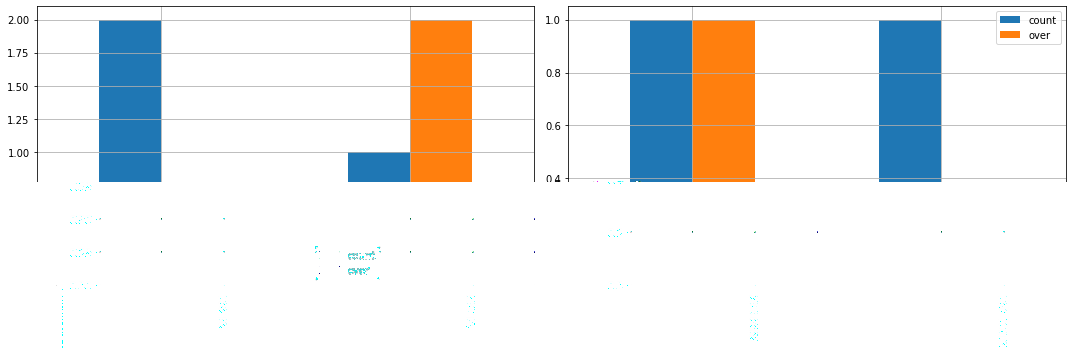

F13 : CA 15-3


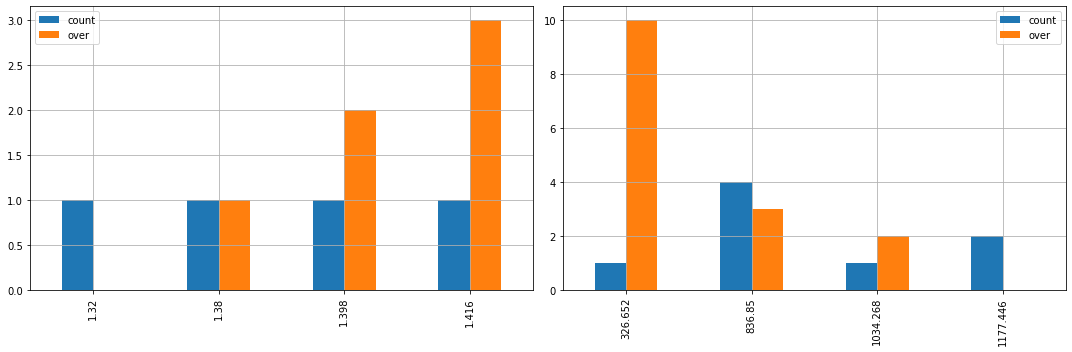

F14 : CA-125


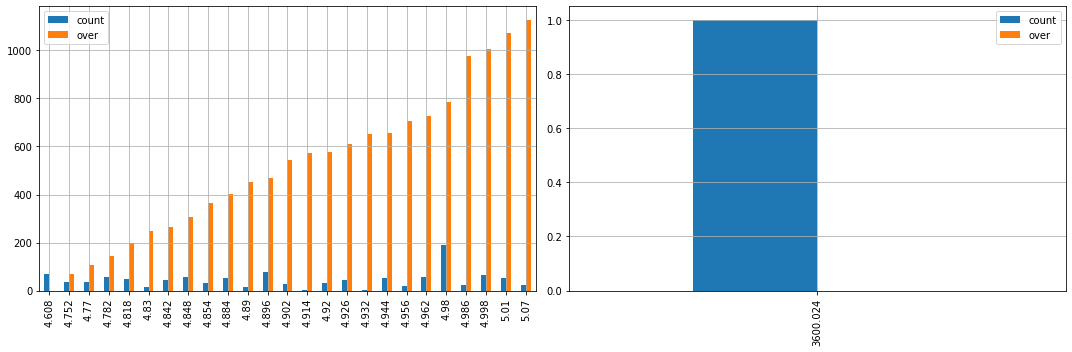

F15 : CA19-9


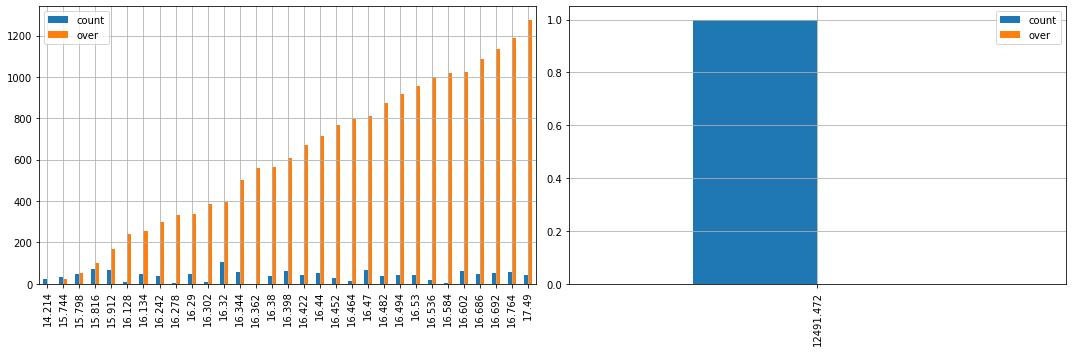

F16 : CD44


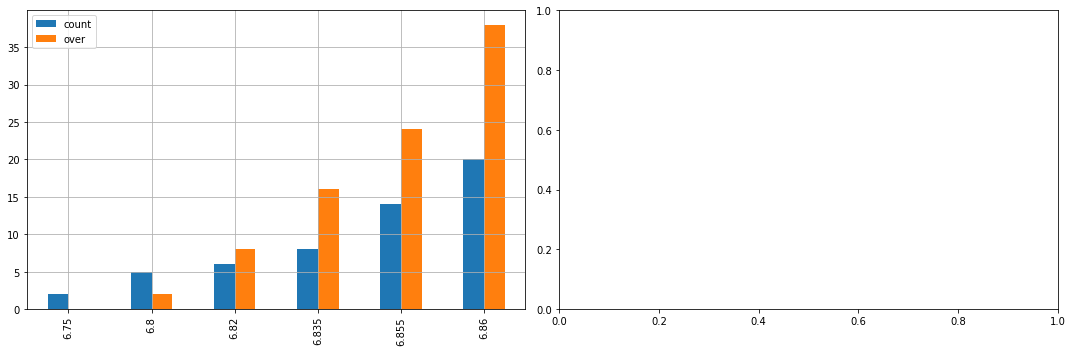

F17 : CEA


F18 : CYFRA 21-1


F19 : DKK1


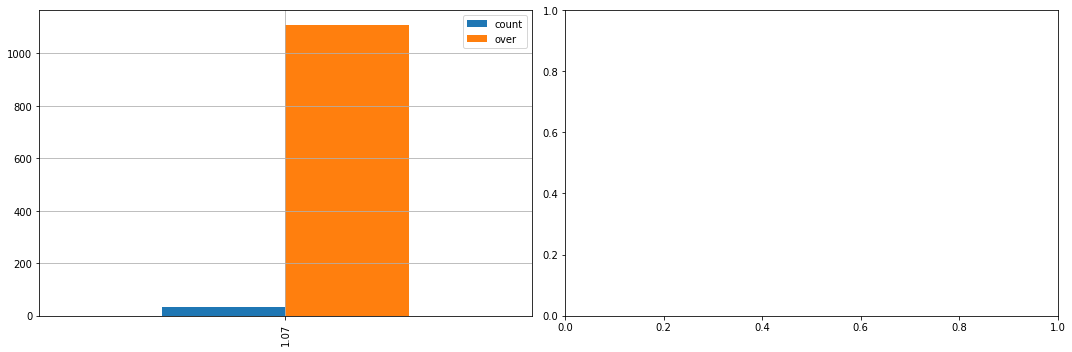

F20 : Endoglin


F21 : FGF2


F22 : Follistatin


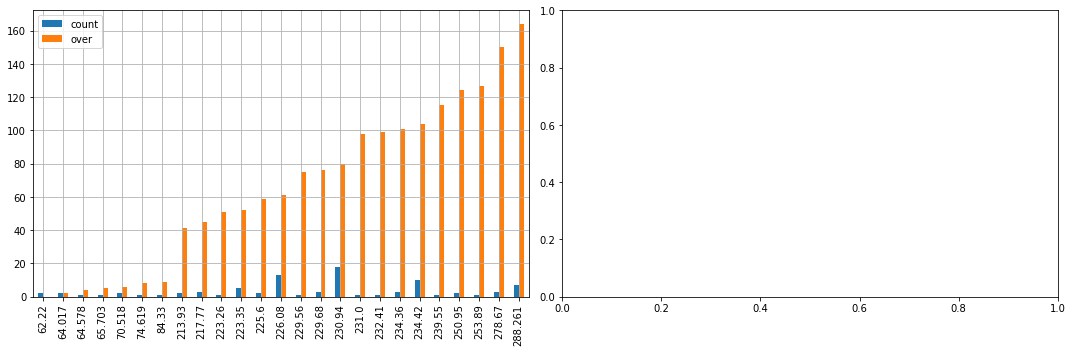

F23 : G-CSF


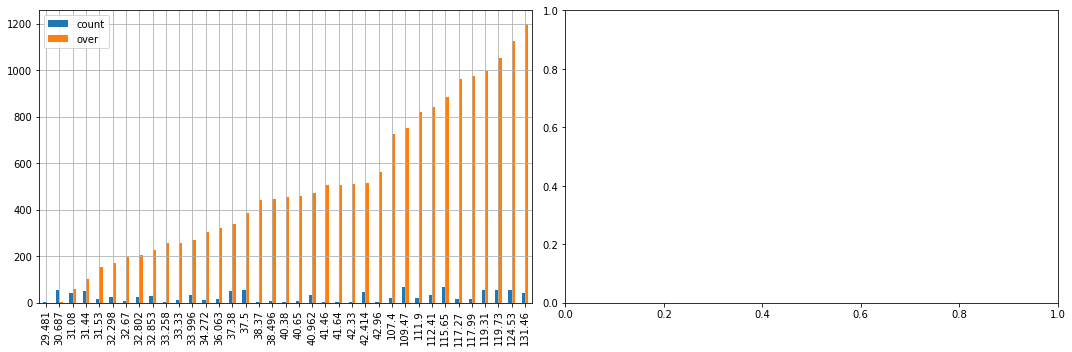

F24 : GDF15


F25 : Galectin-3


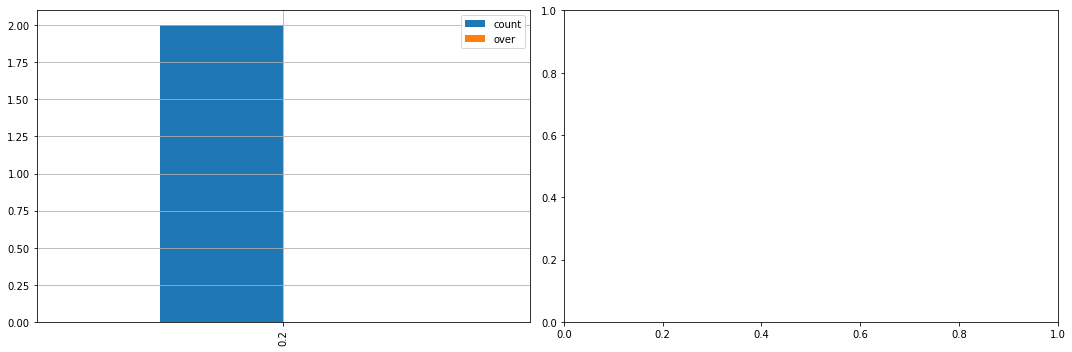

F26 : HE4


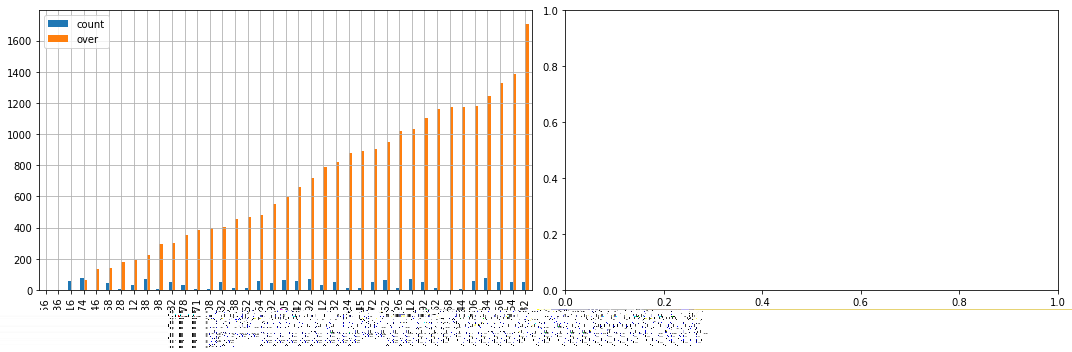

F27 : HGF


F28 : IL-6


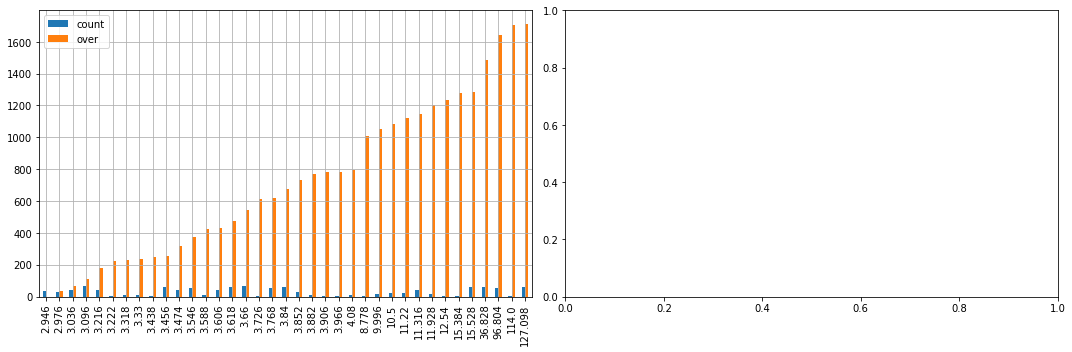

F29 : IL-8


F30 : Kallikrein-6


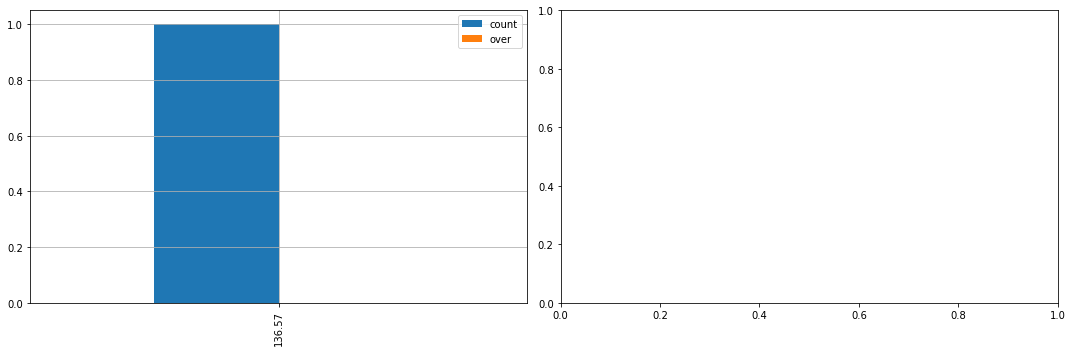

F31 : Leptin


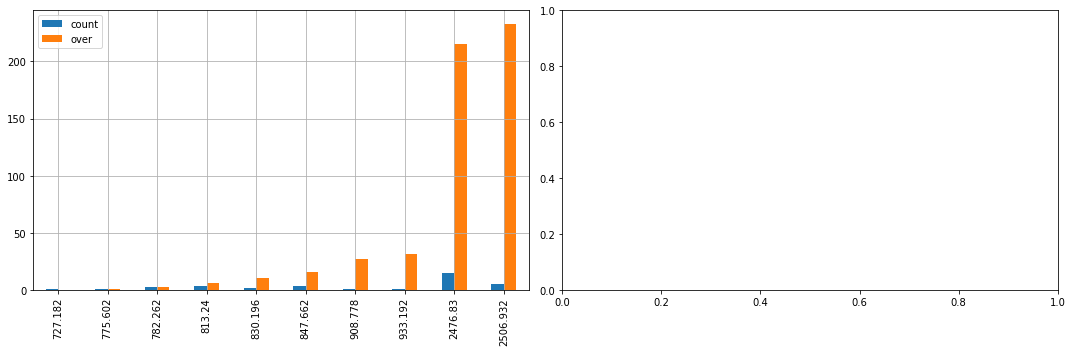

F32 : Mesothelin


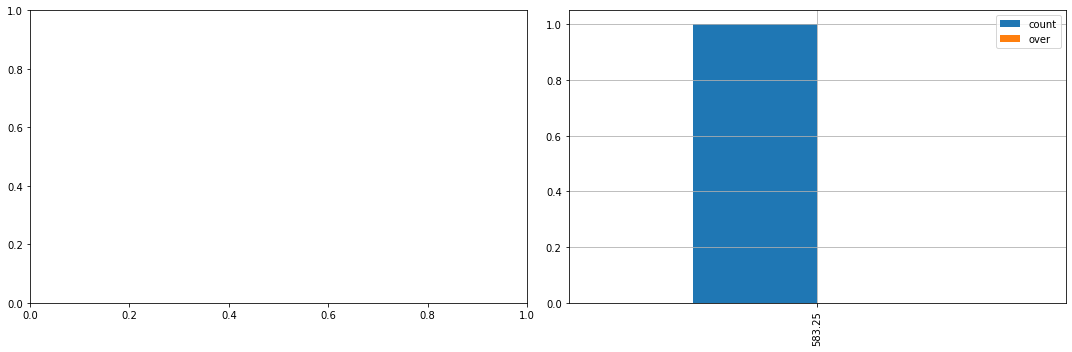

F33 : Midkine


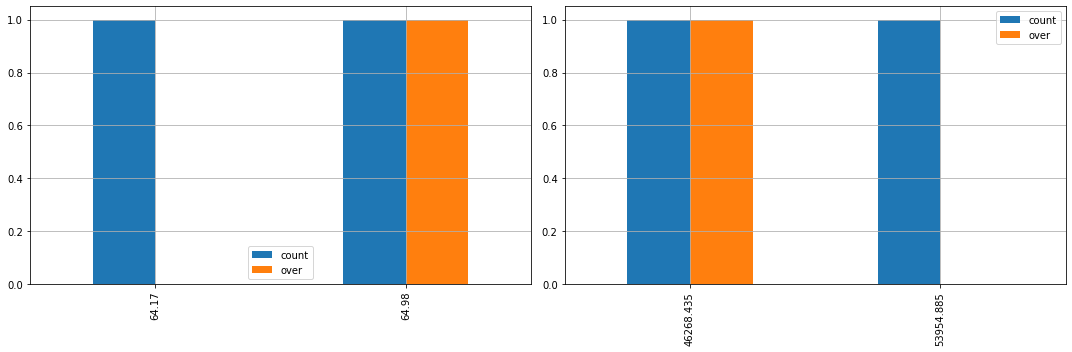

F34 : Myeloperoxidase


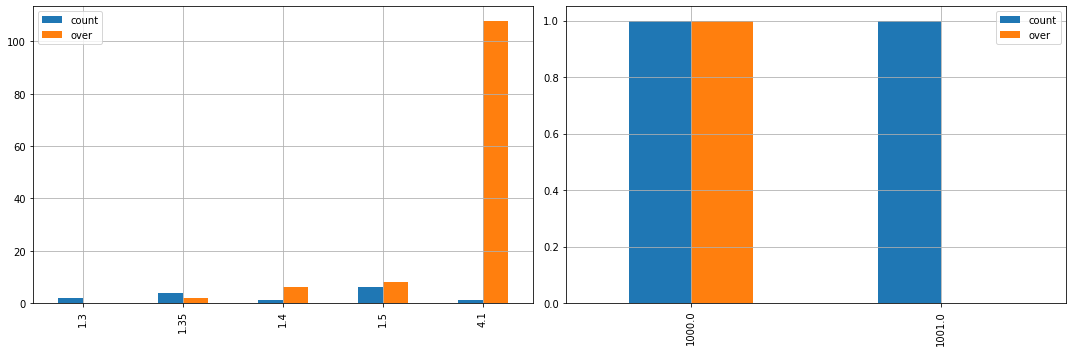

F35 : NSE


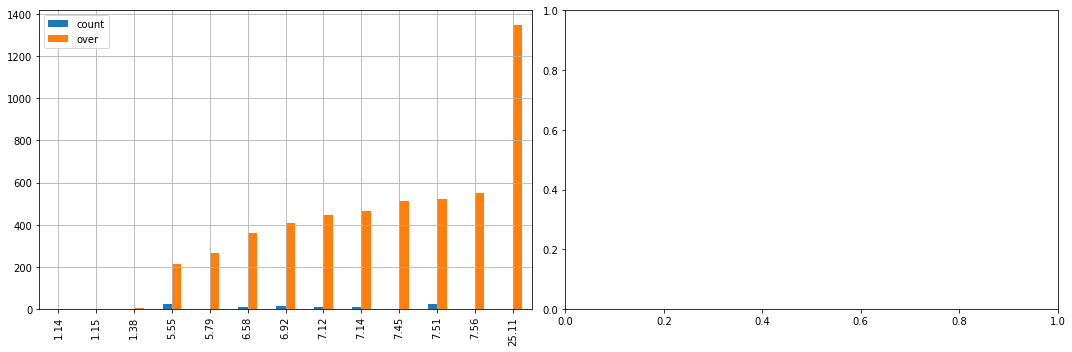

F36 : OPG


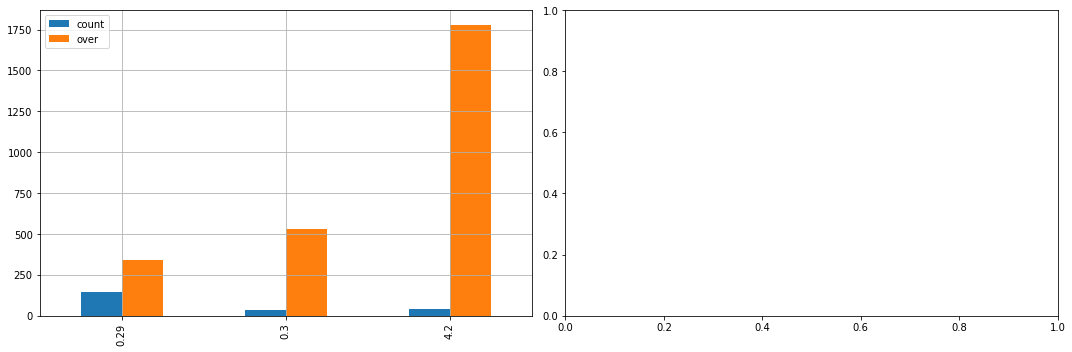

F37 : OPN


F38 : PAR


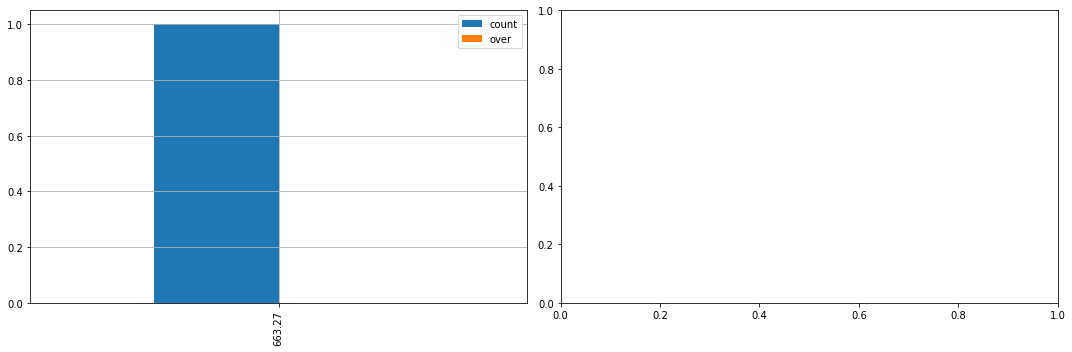

F39 : Prolactin


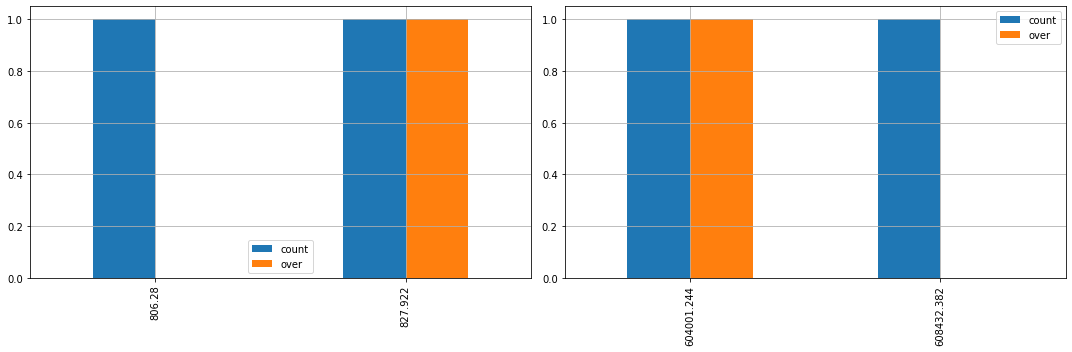

F40 : SHBG


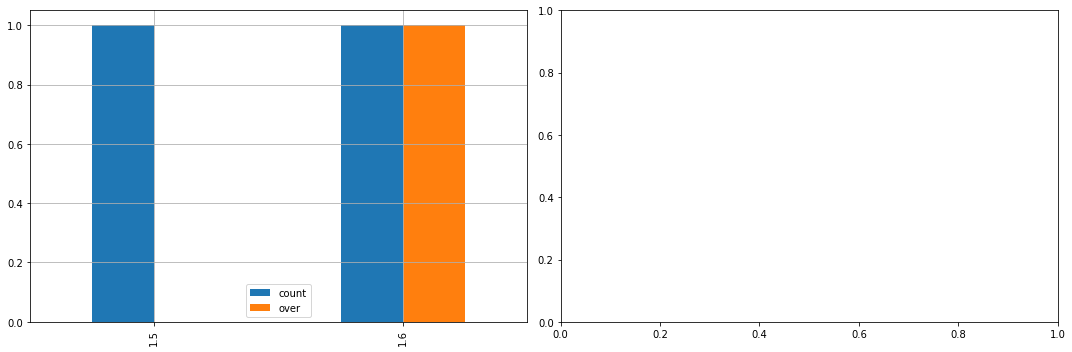

F41 : TGFa


F42 : TIMP-1


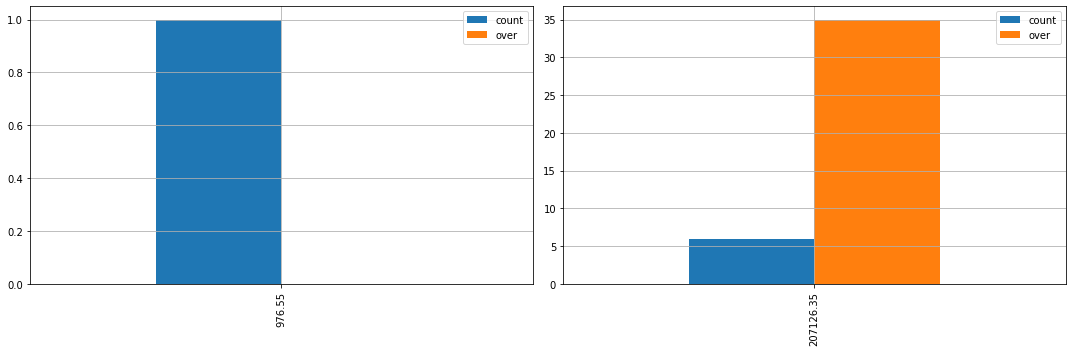

F44 : Thrombospondin-2


F45 : sEGFR


F46 : sFas


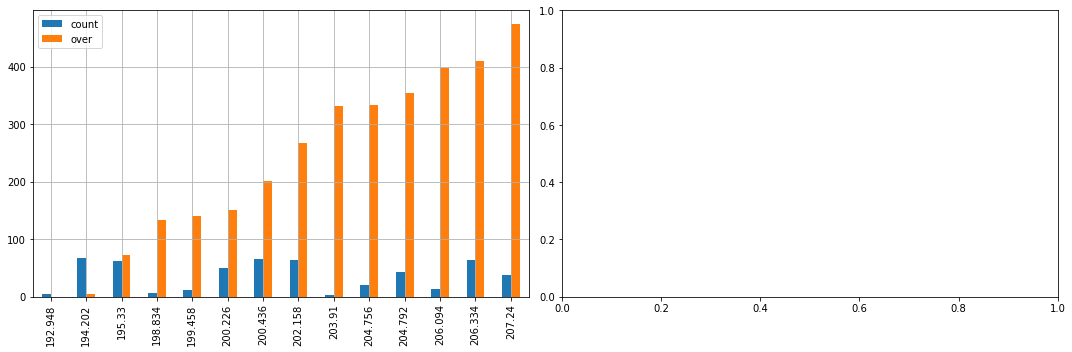

F47 : sHER2/sEGFR2/sErbB2


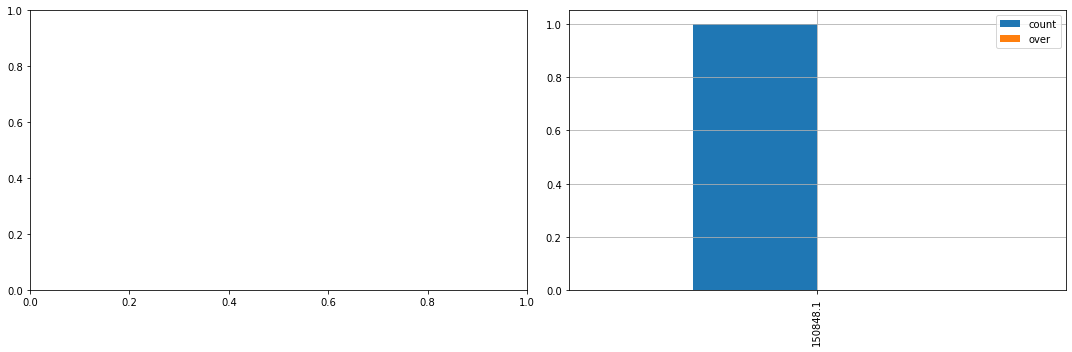

In [20]:
for p in limits.keys():
    print(p,':',ddef.loc[p,'Short_Name'])
    plt.figure(figsize=(15, 5))
    ax = plt.subplot(1, 2, 1)
    if not len(limits[p]['low']) == 0:
        ser = pd.Series(limits[p]['low']).value_counts().sort_index()
        ser = pd.DataFrame(ser, columns=['count'])
        ser['over'] = None
        for i in ser.index:
            ser.loc[i, 'over'] = (dataset[p] < i).sum()
        ser.plot.bar(ax=ax, grid=True)
    ax = plt.subplot(1, 2, 2)
    if not len(limits[p]['high']) == 0:
        ser = pd.Series(limits[p]['high']).value_counts().sort_index()
        ser = pd.DataFrame(ser, columns=['count'])
        ser['over'] = None
        for i in ser.index:
            ser.loc[i, 'over'] = (dataset[p] > i).sum()
        ser.plot.bar(ax=ax, grid=True)
    plt.tight_layout()
    plt.show()

<p>it seems clipping data based on min upper bound and max lower bound will delete a lot of information (mainly on lower limits)</p>
<p>what causes these limits at all?</p>

# preprocessing

In [64]:
from sklearn import preprocessing as skprep

In [65]:
dss = myhandles.canseek_load(path_data_proprocessed_,
                             folds=[[0], [1], [2], [3]])
pnas = dss[-1]
dss = dss[:-1]
dataset = myhandles.canseek_load(path_data_proprocessed_,
                                 folds=[[0, 1, 2, 3]],
                                 load_pnas=False)[0]
ddef = pd.read_csv(path_data_proprocessed_ + 'dataset_main_ddef.csv',
                   index_col=0)

## age

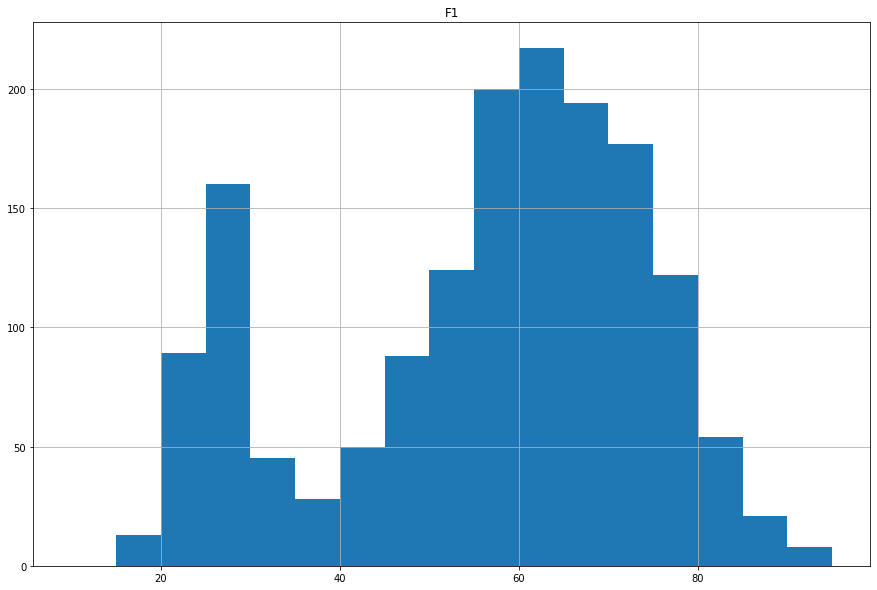

In [22]:
dataset.hist(column=['F1'], figsize=(15, 10),
             grid=True, bins=range(10, 100, 5))
plt.show()
c = 1
plt.figure(figsize=(15, 10))
for n, d in dataset.groupby('T1'):
    ax = plt.subplot(3, 3, c)
    d.hist(column='F1', ax=ax, grid=True, bins=range(10, 100, 5))
    plt.title(n)
    c += 1

min-max scaling (between 0-100) seems to be a good choice

##  Protein

In [73]:
markers=['F{}'.format(i) for i in range(10,49)]

### Multiple of Median

In [85]:
myhandles.default_fig(figsize=(15, len(markers) / 2 * 5))
for c, i in enumerate(markers):
    ax = plt.subplot(len(markers) // 2 + 1, 2, c + 1)
    for d in dss:
        d = d.loc[d.T2==0]
        d = np.log(d[i] / ddef.loc[i].Normal_median_fold2)
        rng = np.linspace(d.min(),d.max(),100)
        d.plot.kde(ax=ax,ind = rng)
        plt.title(i)

In [95]:
myhandles.default_fig(figsize=(15, len(markers) / 2 * 5))
for c, i in enumerate(markers):
    ax = plt.subplot(len(markers) // 2 + 1, 2, c + 1)
    #
    d = dataset.loc[dataset.T2 == 0]
    d = np.log(d[i] / ddef.loc[i].Normal_median_fold1)
    rng = np.linspace(d.min(), d.max(), 100)
    d.plot.kde(ax=ax, ind=rng, label='main_control')
    #
    d = pnas.loc[pnas.T2 == 0]
    d = np.log(d[i] / d[i].sample(frac=.3).median())
    rng = np.linspace(d.min(), d.max(), 100)
    d.plot.kde(ax=ax, ind=rng, label='PNAS_Control')
    #
    d = dataset.loc[dataset.T2 != 0]
    d = np.log(d[i] / ddef.loc[i].Normal_median_fold1)
    rng = np.linspace(d.min(), d.max(), 100)
    d.plot.kde(ax=ax, ind=rng, label='main_case')

    #
    plt.legend()
    plt.title(ddef.loc[i].Short_Name)

### Quantile transforming

AFP (F10)


AXL (F11)


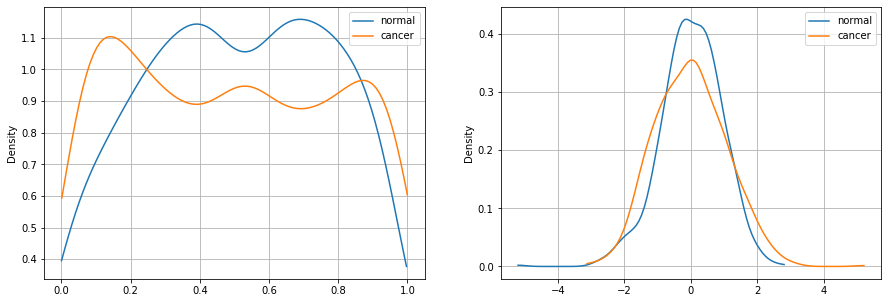

Angiopoietin-2 (F12)


CA 15-3 (F13)


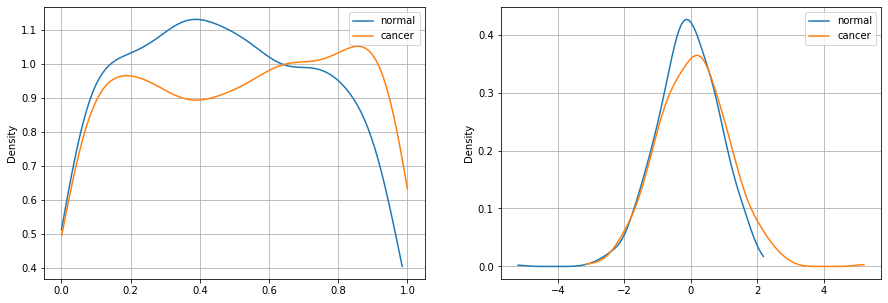

CA-125 (F14)


CA19-9 (F15)


CD44 (F16)


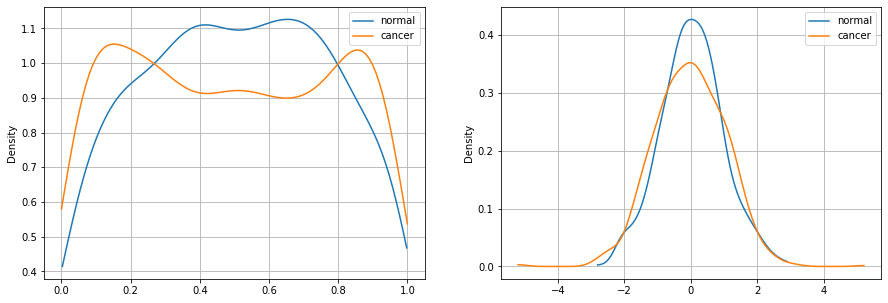

CEA (F17)


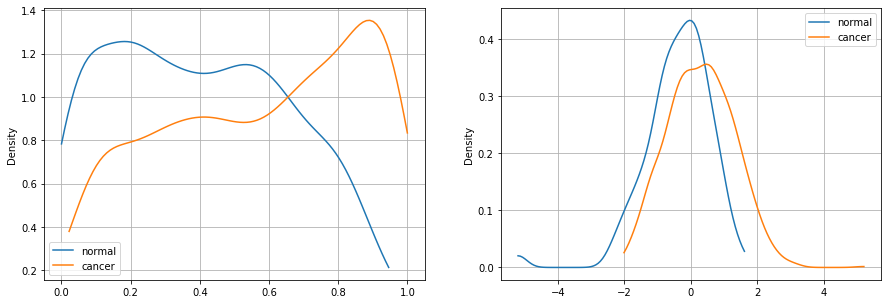

CYFRA 21-1 (F18)


DKK1 (F19)


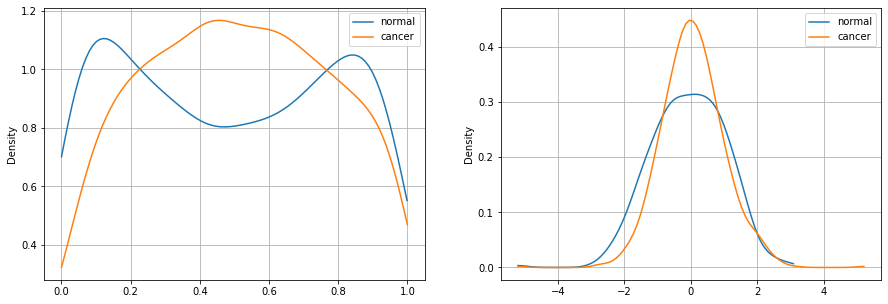

Endoglin (F20)


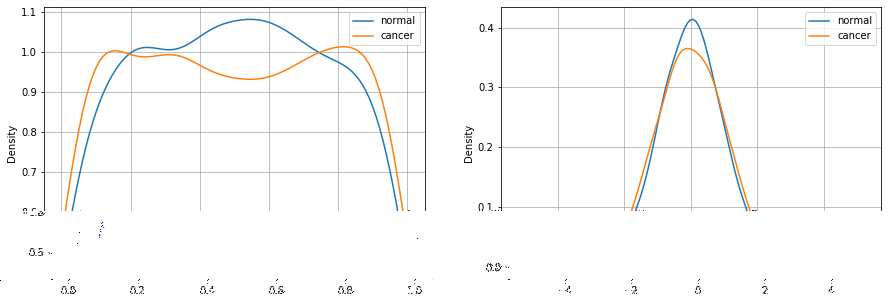

FGF2 (F21)


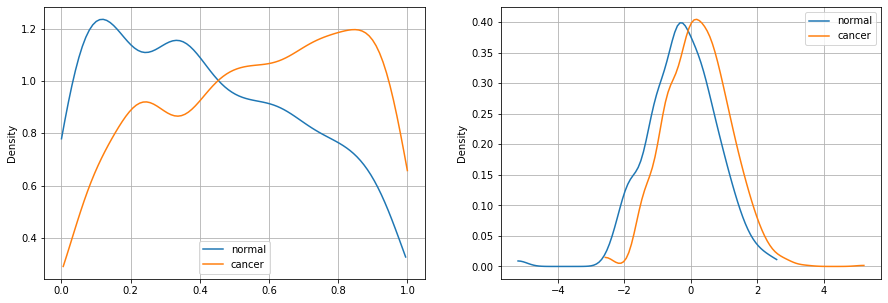

Follistatin (F22)


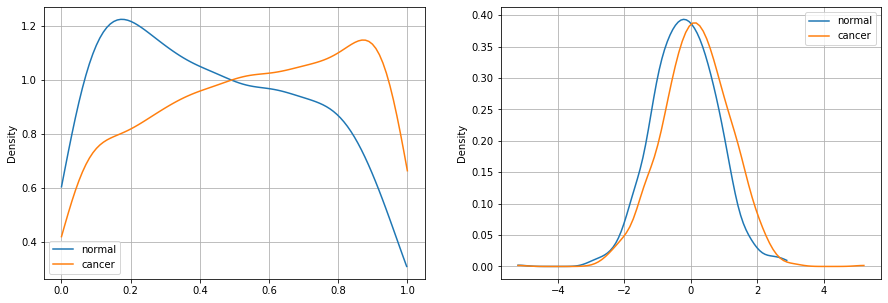

G-CSF (F23)


GDF15 (F24)


Galectin-3 (F25)


HE4 (F26)


HGF (F27)


IL-6 (F28)


IL-8 (F29)


Kallikrein-6 (F30)


Leptin (F31)


Mesothelin (F32)


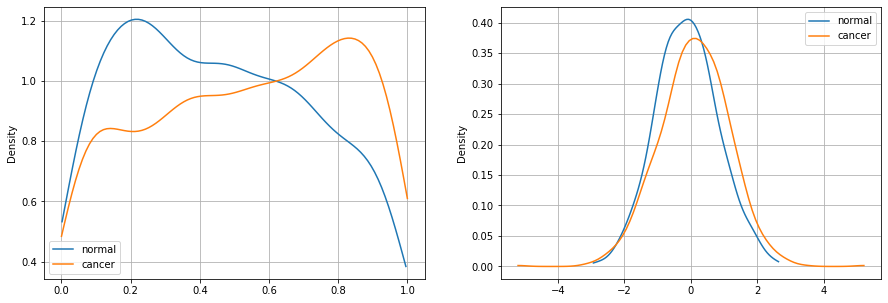

Midkine (F33)


Myeloperoxidase (F34)


NSE (F35)


OPG (F36)


OPN (F37)


PAR (F38)


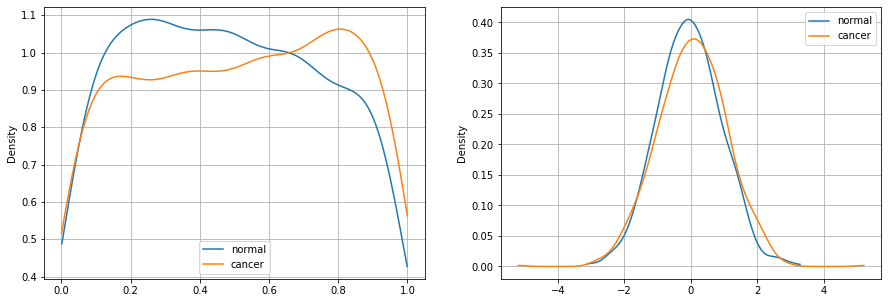

Prolactin (F39)


SHBG (F40)


TGFa (F41)


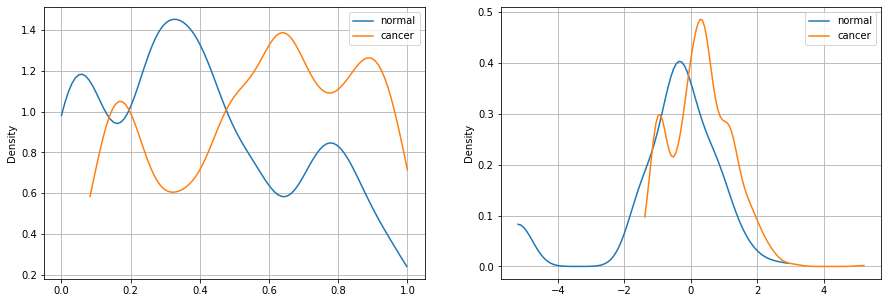

TIMP-1 (F42)


TIMP-2 (F43)


Thrombospondin-2 (F44)


sEGFR (F45)


sFas (F46)


sHER2/sEGFR2/sErbB2 (F47)


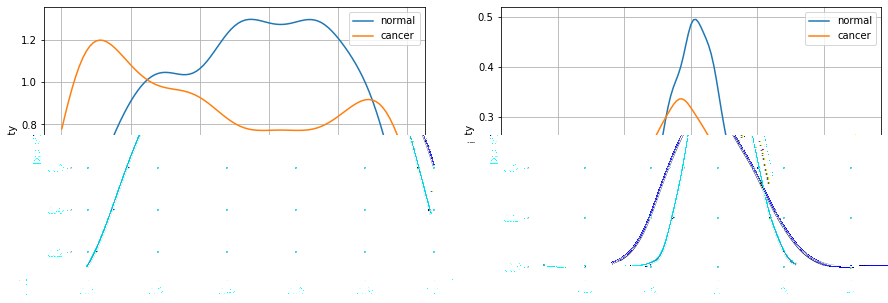

sPECAM-1 (F48)


In [10]:
proteins = ['F{}'.format(x) for x in range(10, 49)]
dataset_tu = dataset[proteins].copy()
dataset_tu['stat'] = dataset.T2.astype(bool).astype(int)
dataset_tn = dataset[proteins].copy()
dataset_tn['stat'] = dataset.T2.astype(bool).astype(int)
dataset_tu[proteins] = skprep.QuantileTransformer().fit_transform(dataset[proteins])
dataset_tn[proteins] = skprep.QuantileTransformer(output_distribution='normal').fit_transform(dataset[proteins])
for p in proteins:
    pname = ddef.loc[p, 'Short_Name']
    print(pname, '({})'.format(p))
    plt.figure(figsize=(15, 5))
    for c, data in enumerate([dataset_tu, dataset_tn]):
        ax = plt.subplot(1, 2, c+1)
        for n, d in data.groupby('stat'):
            d[p].plot.kde(ax=ax,ind=np.linspace(d[p].min(),d[p].max(),100))
        plt.legend(['normal', 'cancer'])
        plt.grid()
    plt.show()

uniform quantile transformation seems much better

# Median normalization

In [15]:
dataset = pd.read_csv(path_data_proprocessed_ + 'dataset/ds_main.csv',
                      index_col=0)
markers_ = [
    'IL6', 'IL8', 'PROLACTIN', 'NSE', 'CA15-3', 'CA19-9', 'CEA', 'AFP',
    'HE4', 'CA125'
]
markers = [f'p_{x}' for x in markers_]
markers_l = [f'l_{x}-limit' for x in markers_]

In [34]:
dataset[markers_l].any(axis=1).sum()/len(dataset)

0.9842767295597484